## Final Project Submission

* Student name: Simran Kaur
* Student pace: Part Time
* Scheduled project review date/time: Thursday, January 5th, 2023. 
* Instructor name: Morgan Jones
* Blog post URL: TBD


# King County Housing Analysis

## Overview

The aim of this project is to develop a multiple regression model than can predict which features add the most value to a home. Data will be taken from the King County Housing dataset; it contains information on the size, location, condition, and other features of houses in King County, Washington. 

## Obtaining Data

In [1]:
# Import modules and packages

# Data manipulation
import pandas as pd
import numpy as np

# Statistical analysis and modeling 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from scipy.stats import norm

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data from csv file & create dataframe. Preview first 10 rows.
df = pd.read_csv('data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


#### Summary of features in the dataframe:

* id - Unique identifier for a house
* date - Date house was sold
* price - Prediction target
* bedrooms - Number of of bedrooms in the house
* bathrooms - Number of bathrooms in the house
* sqft_living - Square footage of the house
* sqft_lot - Square footage of the lot
* floors - Total floors in the house
* waterfront - If the house has a waterfront view or not
* view - Overall view that can be seen from the house
* condition - Overall condition of the house
* grade - Overall grade given to the house, based on King County grading system
* sqft_above - Square footage of house, seperate from the basement
* sqft_basement - Square footage of the basement
* yr_built - Year house was built
* yr_renovated - Year house was renovated
* zipcode - Zipcode
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - Square footage of the interior housing living space for the nearest 15 neighbors
* sqft_lot15 - Square footage of the land lots of the nearest 15 neighbors

## Explanatory Data Analysis (EDA) - Part I

* This section is dedicated to cleaning the dataset and creating new columns for a stronger analysis. 

In [3]:
# Assess dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The ID column can be deleted as it is used to strictly identify the houses in dataset. It doesn't hold any value in terms of the analysis. 

In [4]:
# Drop "id" column as it is not needed
df.drop(['id'], axis=1, inplace=True)

# Rename lat, long, yr_built & ys_renovated columns
df = df.rename(columns = {'lat':'latitude'})
df = df.rename(columns = {'long':'longitude'})
df = df.rename(columns = {'yr_built':'year_built'})
df = df.rename(columns = {'yr_renovated':'year_renovated'})

In [5]:
# Check which columns(if any) have "?" as a value
df.eq('?').any()

date              False
price             False
bedrooms          False
bathrooms         False
sqft_living       False
sqft_lot          False
floors            False
waterfront        False
view              False
condition         False
grade             False
sqft_above        False
sqft_basement      True
year_built        False
year_renovated    False
zipcode           False
latitude          False
longitude         False
sqft_living15     False
sqft_lot15        False
dtype: bool

Upon checking the entire dataset for question marks, it was found that the sqft_basement feature has some.

In [6]:
# Replace "?" with NaN
df['sqft_basement'].replace("?", np.nan, inplace = True)

# Change datatype of the sqft_basement column, from an object, to an integer
df['sqft_basement'] = df['sqft_basement'].astype('float64') 

# Change datatype of date column, from an object, to datetime
df['date'] = pd.to_datetime(df['date']) 

# Recheck dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21597 non-null  datetime64[ns]
 1   price           21597 non-null  float64       
 2   bedrooms        21597 non-null  int64         
 3   bathrooms       21597 non-null  float64       
 4   sqft_living     21597 non-null  int64         
 5   sqft_lot        21597 non-null  int64         
 6   floors          21597 non-null  float64       
 7   waterfront      19221 non-null  object        
 8   view            21534 non-null  object        
 9   condition       21597 non-null  object        
 10  grade           21597 non-null  object        
 11  sqft_above      21597 non-null  int64         
 12  sqft_basement   21143 non-null  float64       
 13  year_built      21597 non-null  int64         
 14  year_renovated  17755 non-null  float64       
 15  zi

In [7]:
# Determine what percentage of columns have values missing 
percent_missing = round(df.isnull().sum() * 100 / len(df),3)
missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
missing_value_df.sort_values(by="Missing_Percentage",ascending=False).head()

,Missing_Percentage
year_renovated,17.790
waterfront,11.002
sqft_basement,2.102
view,0.292
date,0.000


The year-renovated column has the highest percentage of values missing, followed by waterfront, sqft_basement and view.

In [8]:
# Drop missing values from columns highlighted above
df.dropna(subset=['year_renovated','waterfront','view','sqft_basement'],inplace=True,axis=0) 

# Confirm there are no more missing values
df.isnull().values.any()

False

In [9]:
# Seperating out the data column to a month and year column
df["date_year"] = df["date"].dt.year 
df['date_month'] = df['date'].dt.month

# Use the month column to creat a season column
df['season'] = ['WINTER' if (i==1) or (i==2) or (i==3) 
                   else 'SPRING' if (i==4) or (i==5) or (i==6) 
                   else 'SUMMER' if (i==7) or (i==8) or (i==9) 
                   else "AUTUMN" for i in df.date_month]

# Check the values in the newly created season column
df['season'].value_counts()

SPRING    4881
SUMMER    4253
AUTUMN    3391
WINTER    2904
Name: season, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            15429 non-null  datetime64[ns]
 1   price           15429 non-null  float64       
 2   bedrooms        15429 non-null  int64         
 3   bathrooms       15429 non-null  float64       
 4   sqft_living     15429 non-null  int64         
 5   sqft_lot        15429 non-null  int64         
 6   floors          15429 non-null  float64       
 7   waterfront      15429 non-null  object        
 8   view            15429 non-null  object        
 9   condition       15429 non-null  object        
 10  grade           15429 non-null  object        
 11  sqft_above      15429 non-null  int64         
 12  sqft_basement   15429 non-null  float64       
 13  year_built      15429 non-null  int64         
 14  year_renovated  15429 non-null  float64       
 15  zi

In [11]:
# Drop the date_year and date_month columns as they are no longer needed
df.drop(['date_year', 'date_month'], axis=1, inplace=True)

In [12]:
# Recheck dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            15429 non-null  datetime64[ns]
 1   price           15429 non-null  float64       
 2   bedrooms        15429 non-null  int64         
 3   bathrooms       15429 non-null  float64       
 4   sqft_living     15429 non-null  int64         
 5   sqft_lot        15429 non-null  int64         
 6   floors          15429 non-null  float64       
 7   waterfront      15429 non-null  object        
 8   view            15429 non-null  object        
 9   condition       15429 non-null  object        
 10  grade           15429 non-null  object        
 11  sqft_above      15429 non-null  int64         
 12  sqft_basement   15429 non-null  float64       
 13  year_built      15429 non-null  int64         
 14  year_renovated  15429 non-null  float64       
 15  zi

All blank values were dropped, resulting in complete dataset with 15,429 rows.

## Explanatory Data Analysis (EDA) - Part II

* This section is dedicated to differentiating between the features of the dataset and creating visuals to highlight their properties. The visuals will allow one to draw conclusions before building the model. 

In [13]:
# Check the number of unique values in all columns to determine variable type
df.nunique()

date               369
price             3006
bedrooms            12
bathrooms           27
sqft_living        905
sqft_lot          7805
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         829
sqft_basement      282
year_built         116
year_renovated      69
zipcode             70
latitude          4722
longitude          726
sqft_living15      689
sqft_lot15        7027
season               4
dtype: int64

### Conclusion: 

Categorical Features (finite number of categories/groups):
* waterfront
* view
* condition 
* grade
* zip code
* season

Discrete Features (numeric value with a finite number of possible values):
* bedrooms
* bathrooms
* floors
* year_built
* year_renovated

Continuous Features (numeric value with an infinite number of possible values):
* price
* sqft_living
* sqft_lot
* sqft_above
* sqft_basement
* latitude
* longitude
* sqft_living15
* sqft_lot15

### Categorical Features Analysis

Waterfront, view, condition, grade, zipcode and season are the six categorical feautures in this dataframe. All but zipcode are listed as the datatype object. To visually show the categorical features, zipcode can be converted into an object.

In [14]:
# Change datatype of the zipcode column, from an object, to an integer
df['zipcode'] = df['zipcode'].astype('object') 

NO     15313
YES      116
Name: waterfront, dtype: int64


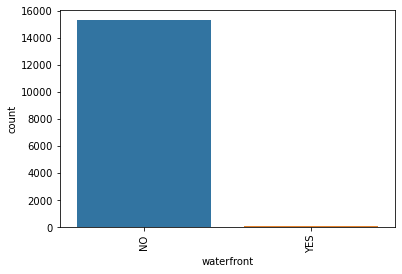

NONE         13947
AVERAGE        666
GOOD           339
FAIR           242
EXCELLENT      235
Name: view, dtype: int64


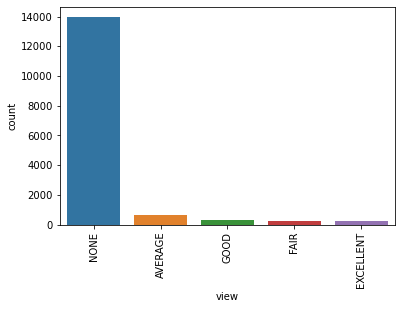

Average      10009
Good          4046
Very Good     1229
Fair           127
Poor            18
Name: condition, dtype: int64


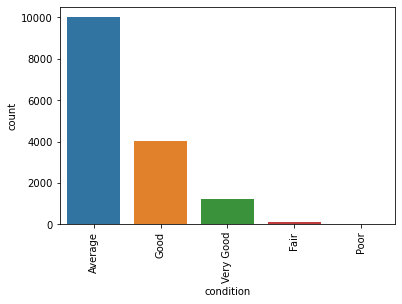

7 Average        6405
8 Good           4338
9 Better         1875
6 Low Average    1454
10 Very Good      816
11 Excellent      286
5 Fair            161
12 Luxury          66
4 Low              16
13 Mansion         11
3 Poor              1
Name: grade, dtype: int64


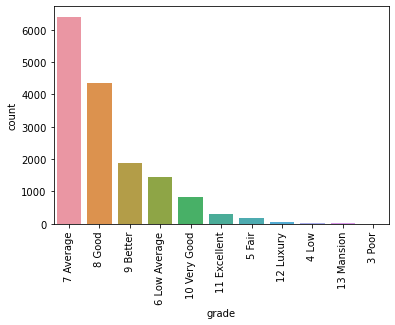

98038    425
98103    415
98052    410
98042    408
98117    394
        ... 
98010     68
98102     63
98024     58
98148     41
98039     35
Name: zipcode, Length: 70, dtype: int64


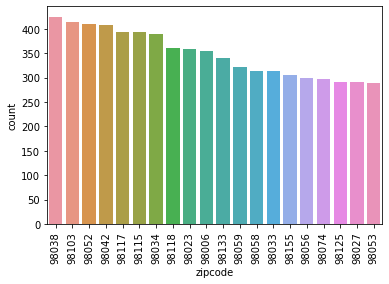

SPRING    4881
SUMMER    4253
AUTUMN    3391
WINTER    2904
Name: season, dtype: int64


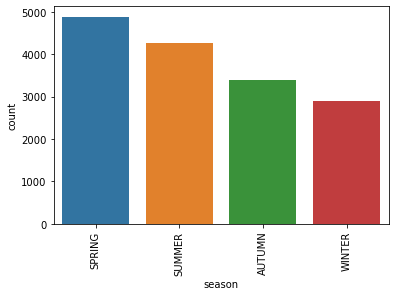

In [15]:
# Plot countplots
object_features = df.select_dtypes(include=["object"])
for i in object_features:
    print(object_features[i].value_counts())
    sns.countplot(x=object_features[i],order= object_features[i].value_counts().iloc[0:20].index)
    plt.xticks(rotation=90)
    plt.show()

#### Conclusions:
* A small population of only 116 houses in King County have a waterfront.
* 90% of houses don't have a view.
* 65% of houses are in average condition and 41% have an average grade. 
* The 98038 zipcode has the highest number of houses.
* House sales are highest in the spring and lowest in the winter. 

### Numerical Features Analysis

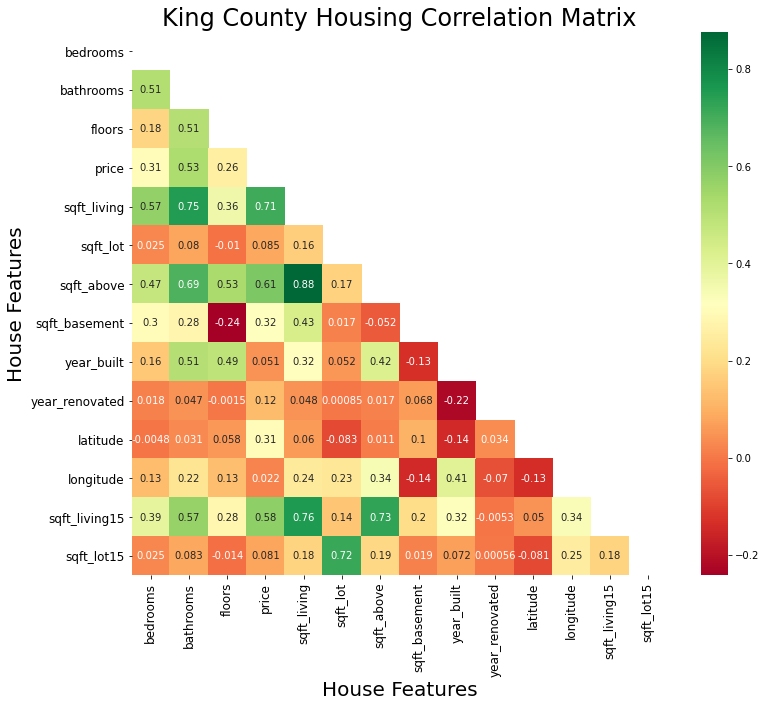

In [16]:
# Plot heatmap to show correlations between all numerical variables (discrete & continous)
numeric_var = ['bedrooms', 'bathrooms', 'floors','price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                'year_built', 'year_renovated', 'latitude', 'longitude', 'sqft_living15', 'sqft_lot15']
corr_matrix = df[numeric_var].corr()
matrix = np.triu(corr_matrix)
plt.subplots(figsize=(12,10))

# Generate mask for upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlGn')

# Label plot
plt.title('King County Housing Correlation Matrix', size=24)
plt.xlabel('House Features', size=20)
plt.ylabel('House Features', size=20)
plt.xticks(size=12)
plt.yticks(size=12);

A heatmap shows correlations between two different features in the dataset. This visual allows one to see which features have a strong relationship.

#### Conclusions:
* Sqft_above and sqft_living have the highest correlation at 0.88. This shows they have a strong and positive relationship. 
* Sqft_basement and floors have a the lowest correlation at -0.24. This indicates they have an inverse relationship.

### Dropping Highly-Correlated Features

* A correlation of 0.7 indicates a strong and positive relationship between two features. While that is good industry benchmark, correlations of 0.9 or higher will be dropped for this analysis.
* Highly correlated features are dropped as they raise speed and storage concerns in models.
* This step is a natural part of the EDA process. 

In [17]:
print("The original dataframe has {} columns.".format(df.shape[1]))

# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

# Drop features
reduced_df = df.drop(to_drop, axis=1)
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 21 columns.
The reduced dataframe has 21 columns.


As there are no correlations greater than 0.9, no features were dropped.

In [18]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,season
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,AUTUMN
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,AUTUMN
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,WINTER
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,SPRING
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,SPRING


### Analysis on All Variables

In [19]:
# Plot pairplots of all features in the dataframe 

sns.pairplot(df)

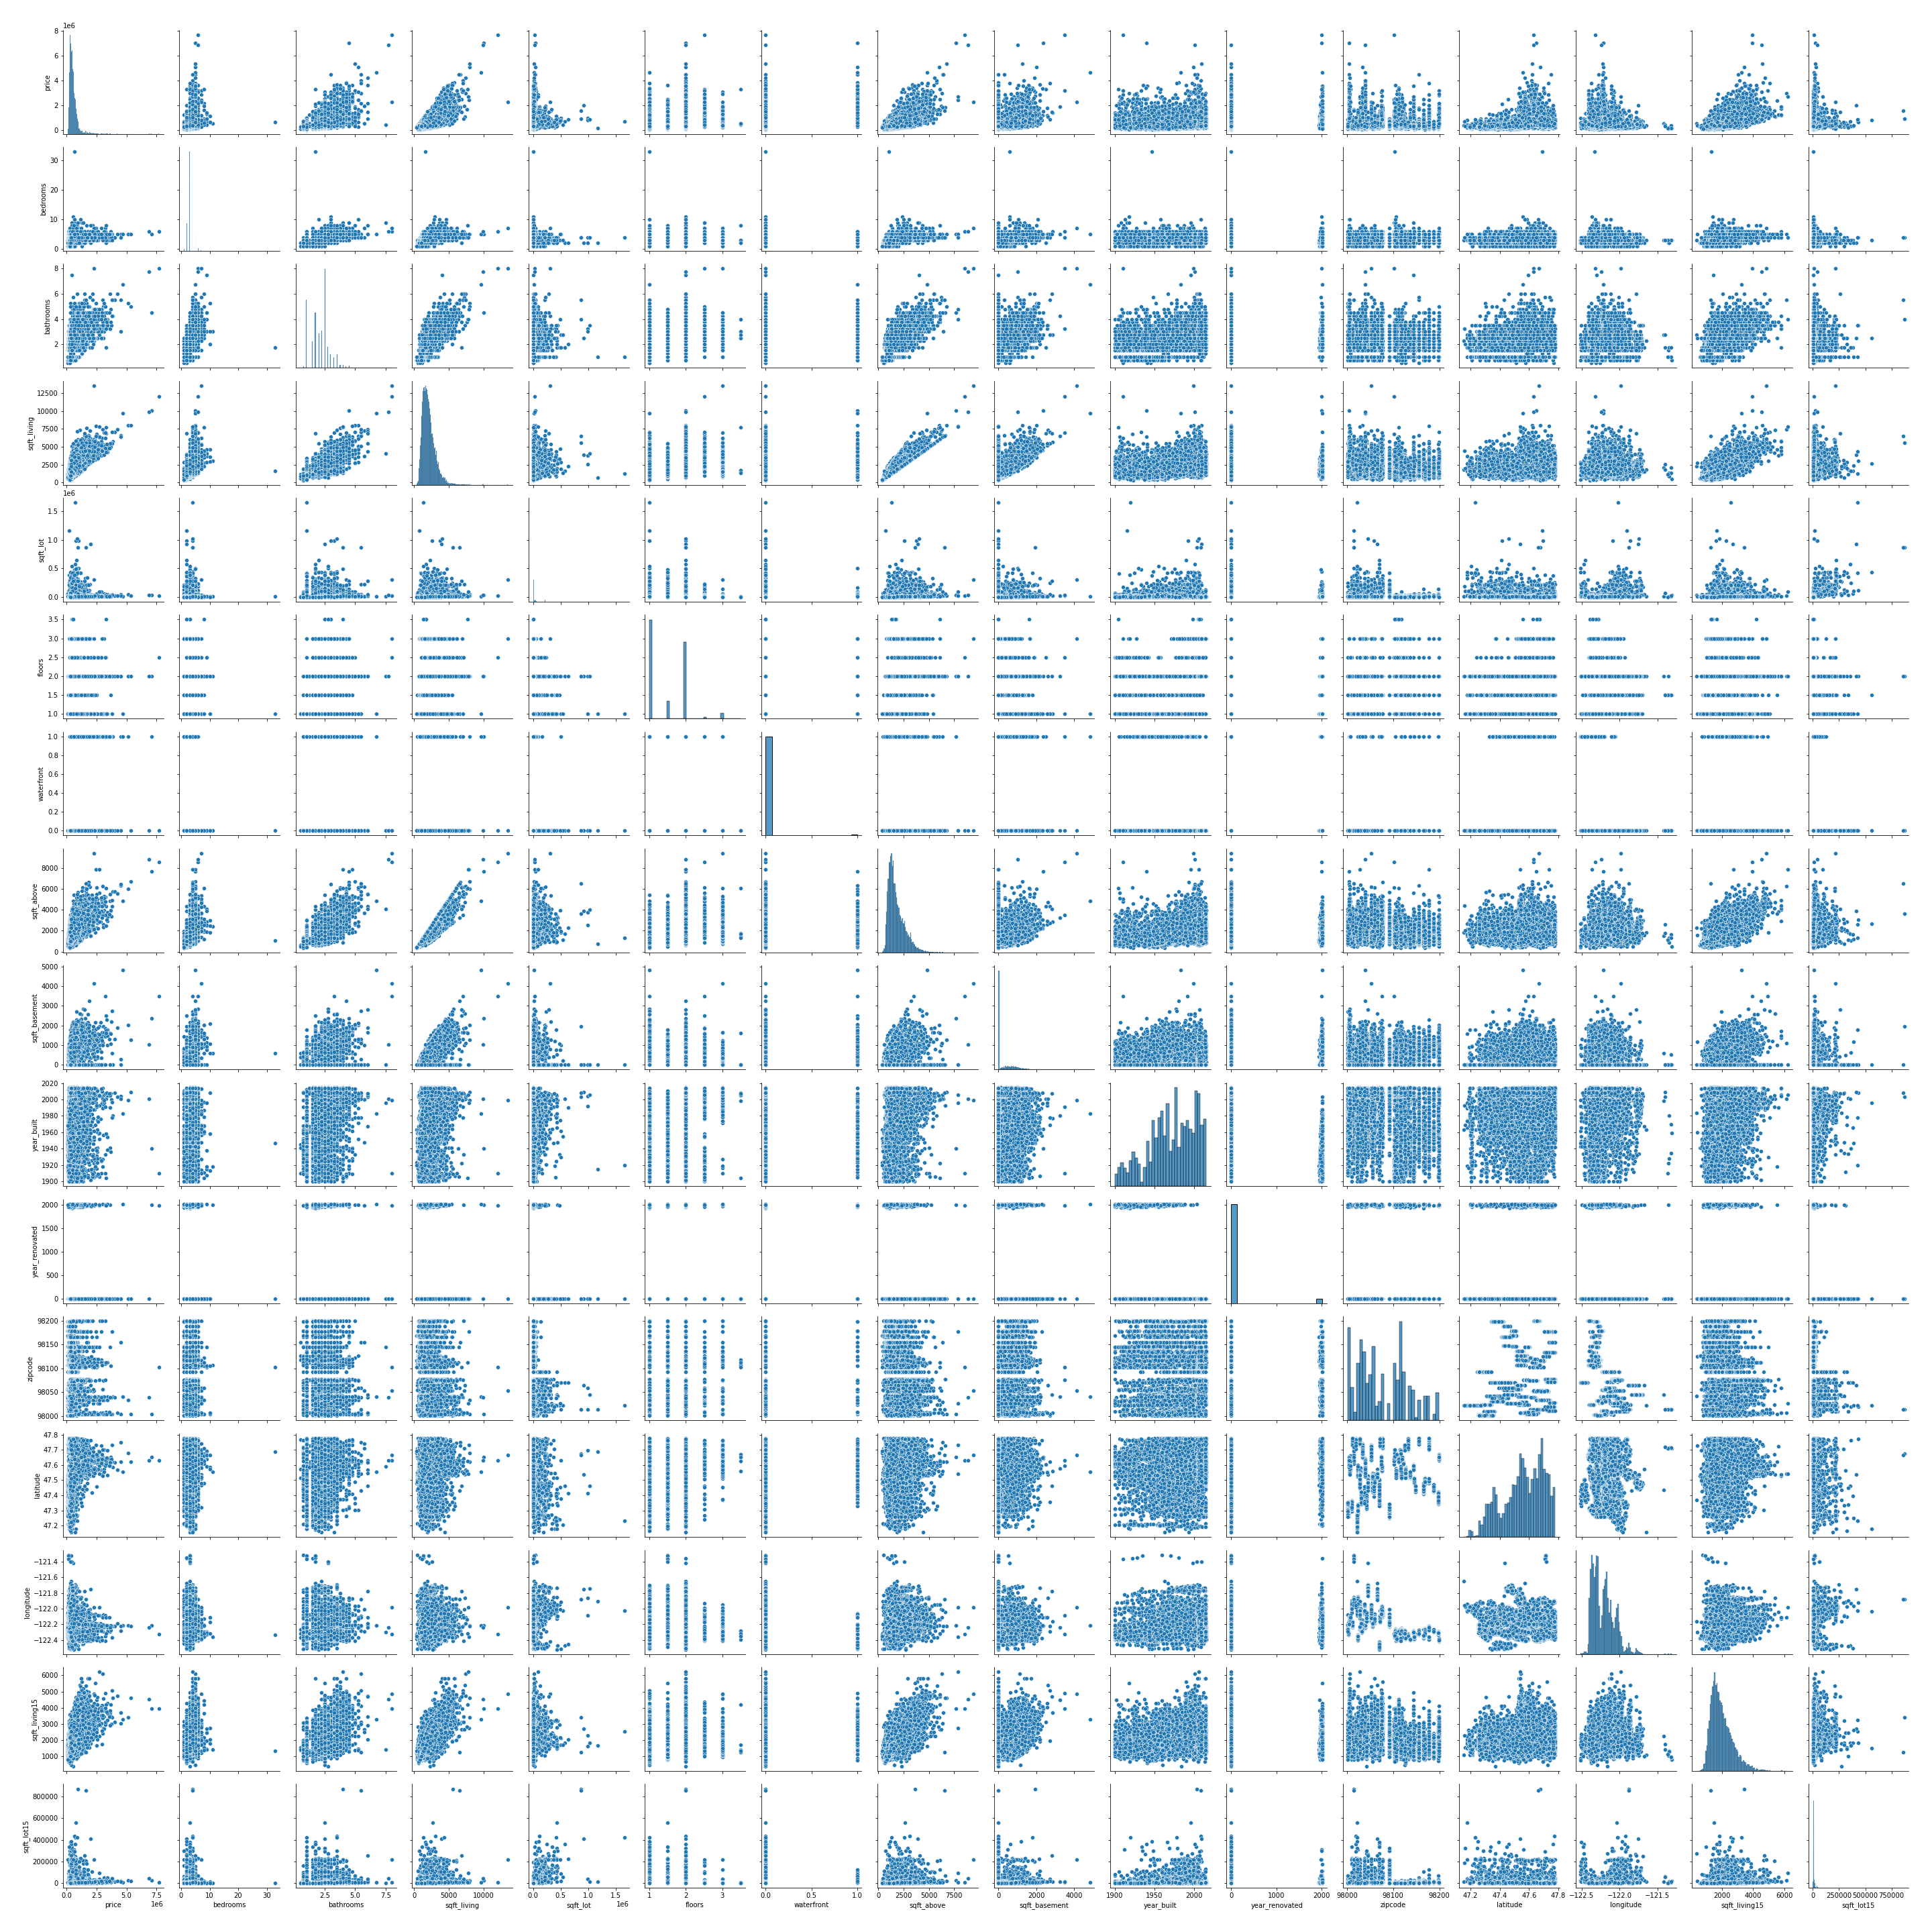

In [20]:
from IPython.display import Image
Image(filename="images/all_features_pairplots.jpeg")

### Analysis on "Price" Feature 

Price will be used as the dependent variable in this analysis. 

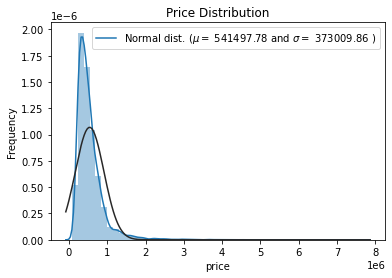

In [21]:
# Plot distribution
sns.distplot(df['price'] , fit=norm);
(mu, sigma) = norm.fit(df['price'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

#### Conclusions:
* The price feature has a mean of $541,497.78 and a standard deviation of 373,009.86. 
* From the shape of the distribution, it can be concluded that there are outliers in the price column. The plot has a long tail to the right, which shows there are very few houses with very high prices. 

### Converting Object Datatype Features
* The dataframe has five categorical values, all of which are an object datatype. These need to be changed to integers so they can be plotted and put into the model.

In [22]:
# Assess dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            15429 non-null  datetime64[ns]
 1   price           15429 non-null  float64       
 2   bedrooms        15429 non-null  int64         
 3   bathrooms       15429 non-null  float64       
 4   sqft_living     15429 non-null  int64         
 5   sqft_lot        15429 non-null  int64         
 6   floors          15429 non-null  float64       
 7   waterfront      15429 non-null  object        
 8   view            15429 non-null  object        
 9   condition       15429 non-null  object        
 10  grade           15429 non-null  object        
 11  sqft_above      15429 non-null  int64         
 12  sqft_basement   15429 non-null  float64       
 13  year_built      15429 non-null  int64         
 14  year_renovated  15429 non-null  float64       
 15  zi

The five object features that need to be changed are waterfront, view, condition, grade and zipcode.

#### Waterfront

In [23]:
# Check the unique values in the waterfront feature
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [24]:
# Change the values to numbers.
# 0 indicates there is no waterfront and 1 indicates there is. 
df['waterfront'] = df['waterfront'].replace(['NO', 'YES'], ['0', '1'])

# Change datatype of the waterfront column, from an object, to an integer
df['waterfront'] = df['waterfront'].astype('int64') 

#### View

In [25]:
# Check the unique values in the view feature
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [26]:
# Change the values to numbers.
# 0 = no view, 1 = fair view, 2 = average view, 3 = good view & 4 = excellent view
df['view'] = df['view'].replace(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], 
                                            ['0', '1', '2', '3', '4'])

# Change datatype of the view column, from an object, to an integer
df['view'] = df['view'].astype('int64')

#### Condition

In [27]:
# Check the unique values in the condition feature
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [28]:
# Change the values to numbers.
# 0 = poor condition, 1 = fair condition, 2 = average condition, 3 = good condition & 4 = very good condition
df['condition'] = df['condition'].replace(['Poor', 'Fair', 'Average', 'Good', 'Very Good'], 
                                            ['0', '1', '2', '3', '4'])

# Change datatype of the condition column, from an object, to an integer
df['condition'] = df['condition'].astype('int64')

#### Grade

In [29]:
# Check the unique values in the grade feature
df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [30]:
# Change the values to show numbers only
df['grade'] = df['grade'].replace(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', 
                                           '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'], 
                                            ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])

# Change datatype of the grade column, from an object, to an integer
df['grade'] = df['grade'].astype('int64')

#### Zipcode

In [31]:
# Zipcode was an integer when the dataset was initially accessed and therefore, the datatype just needs to changed
df['grade'] = df['grade'].astype('int64')

#### Season

In [32]:
# Check the unique values in the season feature
df['season'].unique()

array(['AUTUMN', 'WINTER', 'SPRING', 'SUMMER'], dtype=object)

In [33]:
# Change the values to show numbers only
df['season'] = df['season'].replace(['WINTER', 'SPRING', 'SUMMER', 'AUTUMN'], 
                                            ['1', '2', '3', '4'])

# Change datatype of the grade column, from an object, to an integer
df['season'] = df['season'].astype('int64')

In [34]:
# Recheck dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            15429 non-null  datetime64[ns]
 1   price           15429 non-null  float64       
 2   bedrooms        15429 non-null  int64         
 3   bathrooms       15429 non-null  float64       
 4   sqft_living     15429 non-null  int64         
 5   sqft_lot        15429 non-null  int64         
 6   floors          15429 non-null  float64       
 7   waterfront      15429 non-null  int64         
 8   view            15429 non-null  int64         
 9   condition       15429 non-null  int64         
 10  grade           15429 non-null  int64         
 11  sqft_above      15429 non-null  int64         
 12  sqft_basement   15429 non-null  float64       
 13  year_built      15429 non-null  int64         
 14  year_renovated  15429 non-null  float64       
 15  zi

Now, all feautures in the dataframe are numerical values.

In [35]:
# Generate 5-point statistics for the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15429.0,541497.782552,373021.946914,82000.0000,320000.0000,450000.0000,643500.0000,7.700000e+06
bedrooms,15429.0,3.378767,0.934200,1.0000,3.0000,3.0000,4.0000,3.300000e+01
bathrooms,15429.0,2.121508,0.767027,0.5000,1.7500,2.2500,2.5000,8.000000e+00
sqft_living,15429.0,2085.516560,919.549240,370.0000,1430.0000,1920.0000,2550.0000,1.354000e+04
sqft_lot,15429.0,15286.159959,41997.368610,520.0000,5050.0000,7620.0000,10720.0000,1.651359e+06
floors,15429.0,1.494556,0.538903,1.0000,1.0000,1.5000,2.0000,3.500000e+00
waterfront,15429.0,0.007518,0.086384,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,15429.0,0.228855,0.759902,0.0000,0.0000,0.0000,0.0000,4.000000e+00
condition,15429.0,2.410979,0.651825,0.0000,2.0000,2.0000,3.0000,4.000000e+00
grade,15429.0,7.664204,1.173757,3.0000,7.0000,7.0000,8.0000,1.300000e+01


#### Some Observations:

* The average mean for bedrooms and bathrooms in King County is 3.38 and 2.12 respectively. 
* The minimum number of beds and baths are 1 and 0.5 and maximum is 33 and 8. Both of these seem to be outliers, causing the data to be skewed. 
* The average living square footage of houses is 2,086 sqft.

### Scatterplots of all Features Against Price

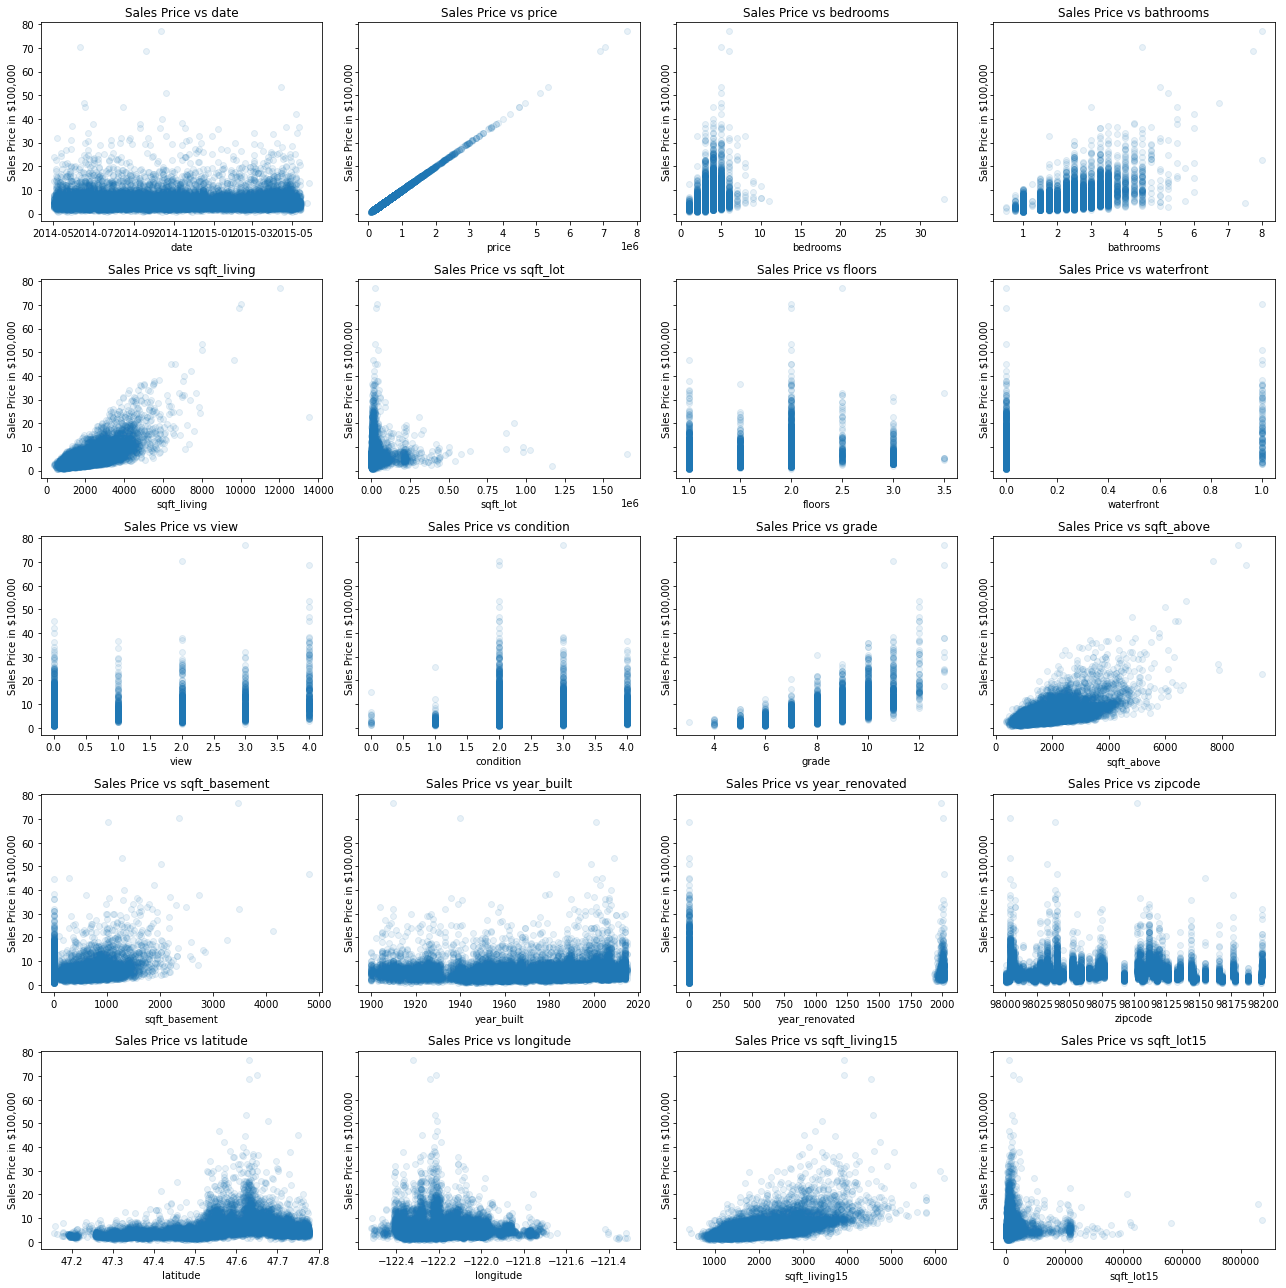

In [36]:
# Scatterplots of all features vs. price
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18,18), sharey=True)
for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sales Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sales Price in $100,000')

fig.tight_layout()

#### Conclusions:
* Bedrooms, bathrooms, sqft_living, grade, sqft_above and sqft_basement and sqft_living15 have a positive correlation with price. 
* The year_built, year_renovated, latitude, longitude and zipcode plots don't show much of a relationship to price. 

In [37]:
# Dropping year_built, year_renovated, latitude, longitude & zipcode from the dataframe.
df.drop(['year_built', 'year_renovated', 'latitude', 'longitude', 'zipcode'], axis=1, inplace=True)

# Recheck dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15429 non-null  datetime64[ns]
 1   price          15429 non-null  float64       
 2   bedrooms       15429 non-null  int64         
 3   bathrooms      15429 non-null  float64       
 4   sqft_living    15429 non-null  int64         
 5   sqft_lot       15429 non-null  int64         
 6   floors         15429 non-null  float64       
 7   waterfront     15429 non-null  int64         
 8   view           15429 non-null  int64         
 9   condition      15429 non-null  int64         
 10  grade          15429 non-null  int64         
 11  sqft_above     15429 non-null  int64         
 12  sqft_basement  15429 non-null  float64       
 13  sqft_living15  15429 non-null  int64         
 14  sqft_lot15     15429 non-null  int64         
 15  season         1542

### Scaling Numerical Features
* Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
* In our example, Min-Max Normalization method is applied. MinMaxScaler is used to reduce the effects of outliers in the dataset. By applying the following method, standard deviation problem that we found above will be solved.
* MinMaxScaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.
* scaling used to create ranges and reduce impact if SD. Make the distribution more normal.

In [38]:
# Scale numerical columns
numeric_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','floors','waterfront','view',
                'sqft_above','condition','grade','sqft_basement','sqft_living15','sqft_lot15', 'season'] 
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in numeric_cols:
    df[i] = scaling(i)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,season
1,2014-12-09,538000.0,0.06250,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.222165,0.008018,1.000000
3,2014-12-09,604000.0,0.09375,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.165376,0.004987,1.000000
4,2015-02-18,510000.0,0.06250,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.241094,0.007862,0.000000
5,2014-05-12,1230000.0,0.09375,0.533333,0.383447,0.061429,0.0,0.0,0.0,0.5,0.8,0.389381,0.317427,0.750473,0.116331,0.333333
8,2015-04-15,229500.0,0.06250,0.066667,0.107062,0.004210,0.0,0.0,0.0,0.5,0.4,0.075221,0.151452,0.237653,0.008562,0.333333


#### Summary of features to be used in modeling:

* price - Prediction target
* bedrooms - Number of of bedrooms in the house
* bathrooms - Number of bathrooms in the house
* sqft_living - Square footage of the house
* sqft_lot - Square footage of the lot
* floors - Total floors in the house
* waterfront - If the house has a waterfront view or not
* view - Overall view that can be seen from the house
* condition - Overall condition of the house
* grade - Overall grade given to the house, based on King County grading system
* sqft_above - Square footage of house, seperate from the basement
* sqft_basement - Square footage of the basement
* sqft_living15 - Square footage of the interior housing living space for the nearest 15 neighbors
* sqft_lot15 - Square footage of the land lots of the nearest 15 neighbors
* season - Season the house was sold

## Modeling using OLS

### Model 1

In [39]:
f = 'price ~ bedrooms + bathrooms + sqft_living + sqft_basement'
model_1 = ols(formula=f, data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     4082.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:52:07   Log-Likelihood:            -2.1427e+05
No. Observations:               15429   AIC:                         4.285e+05
Df Residuals:                   15424   BIC:                         4.286e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.303e+05   6085.689     21.407      0.000    1.18e+05    1.42e+05
bedrooms      -1.926e+06   8.88e+04    -21.704      0.000    -2.1e+06   -1.75e+06
bathrooms      5.816e+04   3.16e+04      1.840      0.066   -3783.782     1.2e+05
sqft_living     4.11e+06   5.09e+04     80.769      0.000    4.01e+06    4.21e+06
sqft_basement  1.075e+05   2.54e+04      4.225      0.000    5.76e+04    1.57e+05
==============================================================================
Omnibus:                    10593.359   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403449.144
Skew:                           2.810   Prob(JB):                         0.00
Kurtosis:                      27.413   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusions:
* Bathrooms has p-value of 0.359, which is much higher than the standard 0.05. This indicates there is not a statically significant relationship between bathrooms and price.
* In this model, bedrooms have a negative coefficient, whch implies adding a bedroom to a house negatively impacts the price of the house.

### Model 2

In [40]:
f = 'price ~ condition + grade + sqft_living + sqft_lot'
model_2 = ols(formula=f, data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     4692.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:52:07   Log-Likelihood:            -2.1370e+05
No. Observations:               15429   AIC:                         4.274e+05
Df Residuals:                   15424   BIC:                         4.274e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.162e+05   1.28e+04    -32.473      0.000   -4.41e+05   -3.91e+05
condition    2.542e+05   1.26e+04     20.242      0.000     2.3e+05    2.79e+05
grade        1.031e+06    2.7e+04     38.177      0.000    9.78e+05    1.08e+06
sqft_living  2.509e+06   4.54e+04     55.325      0.000    2.42e+06     2.6e+06
sqft_lot     -3.85e+05   8.04e+04     -4.786      0.000   -5.43e+05   -2.27e+05
==============================================================================
Omnibus:                    12736.846   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           915667.012
Skew:                           3.508   Prob(JB):                         0.00
Kurtosis:                      40.082   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusions:
* Model 2 has yielded a R-squared greater than model 1. It is also more skewed. 
* All p-values are less than 0.05 however sqft_living has is a negative coefficient.  

### Model 3

In [41]:
f = 'price ~ view + grade + sqft_living + sqft_basement'
model_3 = ols(formula=f, data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5222.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:52:07   Log-Likelihood:            -2.1323e+05
No. Observations:               15429   AIC:                         4.265e+05
Df Residuals:                   15424   BIC:                         4.265e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.171e+05   9082.501    -23.908      0.000   -2.35e+05   -1.99e+05
view           3.848e+05    1.1e+04     35.046      0.000    3.63e+05    4.06e+05
grade          9.584e+05   2.72e+04     35.286      0.000    9.05e+05    1.01e+06
sqft_living    2.145e+06   4.98e+04     43.082      0.000    2.05e+06    2.24e+06
sqft_basement  1.688e+05   2.51e+04      6.714      0.000     1.2e+05    2.18e+05
==============================================================================
Omnibus:                    12303.252   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           904964.743
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      39.933   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusions:
* Model 3 has yielded higher R-squared than models 1 and 2. It is less skewed than model 2. 
* All of the coefficients used are positive, indicating they all add to to the price of the house.

### Modeling Conclusions

The first model was ran using information from the scatterplots; it included features that showed a positive correlatin with price. Bathrooms had a high p-value, indicating there isn't a statistically significant relationship between the two variables. Bedrooms had a negative coefficient, impling that add a bedroom to a house in Kings County would lower the price of the house or inturn, taking out a bedroom would increase the value of the house. These two values were dropped for the next model. 

In the second model, bedrooms and bathrooms were dropped. Different features were used and a higher R-squared value was yielded. The model indicates that the relationship between the dependent variable and the independent variables explains 54.9% of the variation in the data. All p-values were below 0.05 however sqft_lot is a negative coefficient. 

Model 3 was ran using features from both models 1 and 3, with the addition of a new feature. The features used were view, grade, sqft_living and sqft_basement. This change yielded a slightly higher R-squared value and skewness. The adjusted R-squared value is 0.575 and it indicates 57.5% of the variations in dependent variable (price) are explained by the independent variables (condition, grade, sqft_living & sqft_basement) in our model.

## Summarizing the Model

In [42]:
# Create a new dataframe which has only the coefficients from model_3
df2 = df[['price', 'view', 'grade','sqft_living', 'sqft_basement']].copy()

In [43]:
# Create predictors
predictors = df2.drop(['price'], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors);

# Fit model to data
model = sm.OLS(df2['price'],predictors_int).fit()

In [44]:
# View model coefficients
# They describe the mathematical relationship between the independent and dependent variables. 
model.params

const           -2.171471e+05
view             3.847677e+05
grade            9.584359e+05
sqft_living      2.144761e+06
sqft_basement    1.688342e+05
dtype: float64

#### Conclusions:
* According to the model, sqft_living is the highest coefficient. This means that it is the feature that adds the greatest value to the home. Sqft_basement has the lowest coefficient in the model. It adds value to the house, but not as much as the other coefficients. 
* The constant in this model is -217,147.1. This means that if all independent variables are set to 0, the expected value of the dependent variable is less than 0. A negative constant doesn't raise any concerns for the model. 

### Assumptions of Linear Regression

There are 4 assumptions of linear regression, which increases the credability of a model. The assumptions are:
* Linearity: There is a linear relationship between the independent and dependent variables 
* Homoscedasticity: The variance for the residual is the same for any value of x 
* Normality: Residuals are normally distributed
* Independence: Checks that the observations are independent of one another

### Linearity Check

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

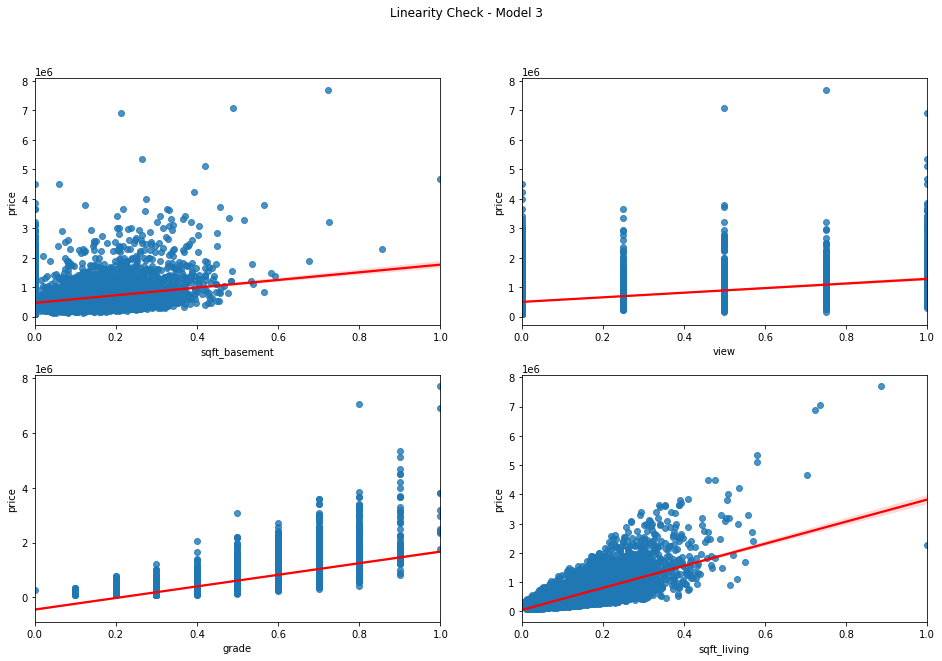

In [45]:
# Plot reg plots to check linearity
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
 
fig.suptitle('Linearity Check - Model 3')
 
sns.regplot(ax=axes[0, 1], data=df2, x='view', y='price', line_kws={"color": "red"})
sns.regplot(ax=axes[1, 0], data=df2, x='grade', y='price', line_kws={"color": "red"})
sns.regplot(ax=axes[1, 1], data=df2, x='sqft_living', y='price', line_kws={"color": "red"})
sns.regplot(ax=axes[0, 0], data=df2, x='sqft_basement', y='price', line_kws={"color": "red"})

#### Conclusions:
* According to the scatterplots above, it can be seen that there is a positive linear relationship between all features used in the model and price. 
* Sqft_living seems to have the strongest relationship to price, whereas view has the weakest. This can be confirmed by calculating the slopes of the plots.  

### Homoscedasticity & Normality
* Homoscedasticity checks if the error is constant along the values of the dependent variable in the entire regression model. 
* The best way to visually check for homoscedascity is by creating a scatterplot with the visuals plotted against the dependent variable. The first step in ploting the scatterplot is to calculate mean absolute error (MAE), which represents the average error in the model. 

* Normality checks if the residuals are normally distributed. 
* Histograms with kde overlay and Q-Q plots are good ways to check for normality.

#### Calculating MAE

In [46]:
# Yield the residuals from the model
residuals = model.resid

# View the residuals
residuals

1          -512.855932
3        146962.688705
4         34592.996470
5       -195596.970581
8       -191918.934973
             ...      
21591     55294.630334
21592    -90979.198501
21593   -178003.784652
21594    130019.930004
21596     52918.930004
Length: 15429, dtype: float64

In [47]:
# Yield the predicted values from the model
y_pred = model.fittedvalues

# View the predicted values
y_pred

1        5.385129e+05
3        4.570373e+05
4        4.754070e+05
5        1.425597e+06
8        4.214189e+05
             ...     
21591    4.197054e+05
21592    4.509792e+05
21593    5.780038e+05
21594    2.720811e+05
21596    2.720811e+05
Length: 15429, dtype: float64

In [48]:
# Assign the dependent variable to "y"
y = df2["price"]

In [49]:
# Return MAE of model
mae_resid = np.mean(np.abs(y - y_pred))

# View residuals from model
mae_resid

158684.1158643296

#### Homoscedasticity Check

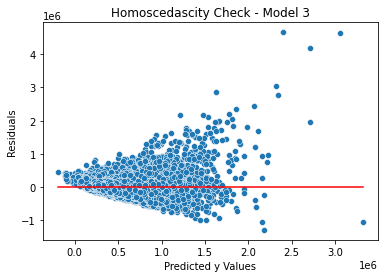

In [50]:
# Plot the residuals against predicted values
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y Values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='red')
p = plt.title('Homoscedascity Check - Model 3')

#### Conclusions:
* The variables in the scatterplot have created a cone-line shape, which means the data is not homoscedastic but rather heteroscedastic. 
* There are more postive residuals versus negative residuals. 
* One cause of this may be a wider range of observed values and one way to fix this is by transforming the dependent variable.

#### Normality Check

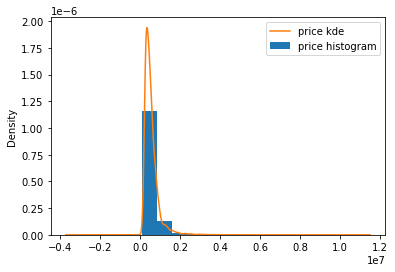

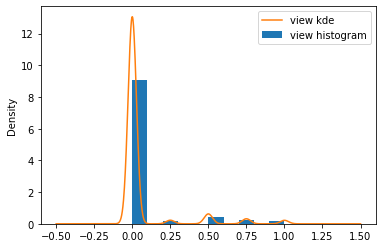

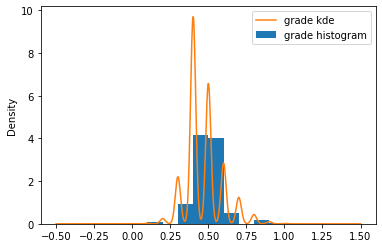

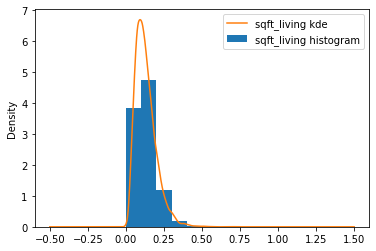

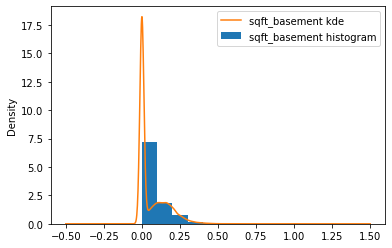

In [51]:
# Plot histograms with kde overlay to check the distribution of the predictors
# Check #1
for column in df2:
    df2[column].plot.hist(density=True, label = column+' histogram')
    df2[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

#### Conclusions:
* In the view, grade and sqft_basement histograms, there are at least two peaks present in each plot. These peaks symbolize the multiple modes present in the feature. This is referred to as bimodal or multimodel distributions. It indicates that there are patterns in the distibution. That makes sense because view and grade are both categorical features.
* Sqft_living has only one peak, which means there is only one more. It is distributed more toowards the left side, with a heavier right tail.

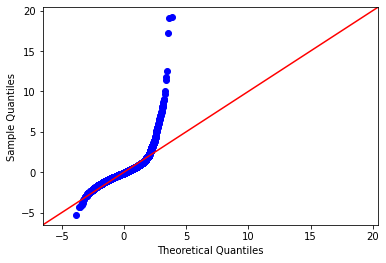

In [52]:
# Ceate a Q-Q plot of the residuals
# Check #2
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

#### Conclusion:
* The points form a curve instead of a straight line. This indicates the data is skewed. 
* This was expected as the summary statistics for model 3 had a skew value of 3.304. 
* One way to fix skewness is by removing the outliers. 

### Independece
* This test checks if the observations are independent of one another. This can be checked with a heatmap/correlation matrix.

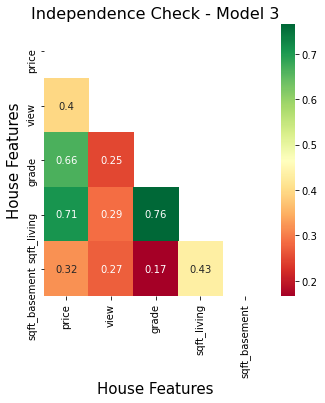

In [53]:
# Plot heatmap to show correlations 
numeric_var = ['price', 'view', 'grade', 'sqft_living', 'sqft_basement']
corr_matrix = df[numeric_var].corr()
matrix = np.triu(corr_matrix)
plt.subplots(figsize=(5,5))

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlGn')

plt.title('Independence Check - Model 3', size=16)
plt.xlabel('House Features', size=15)
plt.ylabel('House Features', size=15)
plt.xticks(size=10)
plt.yticks(size=10);

#### Conclusions:
* As seen above, grade and sqft_living have the highest correlation, at a value of 0.76.
* In relationship to price, sqft_living has the highest correlation, at 0.71.
* Both of these values are greater than 0.7, which indicates the presence of multi-collinearity in the datset.

## Validating the Model

In [54]:
# Split the dataset into training and testing as 75% training and 25% testing
X = df2.drop(["price"],axis=1)
y = df2["price"]
X_train , X_test , y_train ,y_test = train_test_split(X ,y , test_size = 0.25 , random_state = 42)

In [55]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [56]:
# Check the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11571, 4) (11571,) (3858, 4) (3858,)


In [57]:
# Fit the data 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [58]:
# Use the model to predict y values for the test and train data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [59]:
mse_train = float(np.sum((y_train - y_hat_train)**2)/len(y_train))
mse_test = float(np.sum((y_test - y_hat_test)**2)/len(y_test))

print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 60785884714.46178
Test Mean Squared Error: 54168107945.148


The training MSE is much greater than the testing MSE. This model is underfit. This can be fixed by adding more features to the data and/or removing noise from the data.

## Conclusions

Square footage of the house and grade are two features that increase the value of a home. Homeowners who want to sell their homes should focus on increasing the footage of the house and improving the grade of the house. 

The model used had a few limitations; these were seen while checking the four linear assumptions. It would be quite beneficial to remove outliers, drop highly correlatted feautures using a benchmark of 0.7 or 0.8 and log-transforming some of the existing features.